In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
input_df = pd.read_csv('C:\Adithya\Python\Machine_Learning\TimeSeries Forecasting\ChampagneSales Prediction\perrin-freres-monthly-champagne-.csv')
input_df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [67]:
input_df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [69]:
input_df.shape

(107, 2)

In [71]:
input_df.isna().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [73]:
input_df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'},inplace=True)
input_df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [79]:
input_df.drop(input_df.iloc[105:].index,axis=0,inplace=True)
input_df.shape

(105, 2)

In [81]:
input_df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [87]:
input_df['Month'] = pd.to_datetime(input_df['Month'])
input_df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [89]:
input_df.set_index('Month',inplace=True)
input_df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Month'>

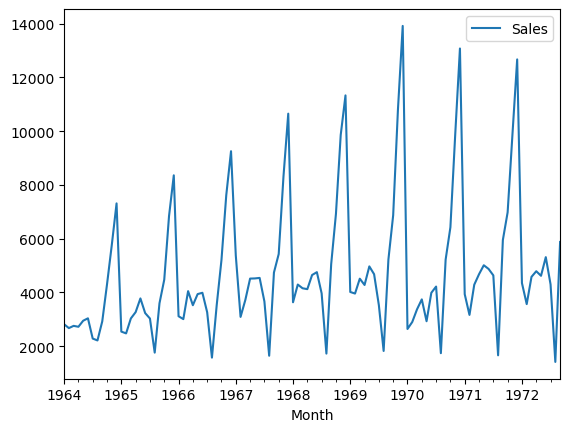

In [91]:
input_df.plot()

In [93]:
from statsmodels.tsa.stattools import adfuller

In [95]:
test_result = adfuller(input_df['Sales'])
test_result

(-1.833593056327623,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [101]:
for value in test_result:
    print(value)

-1.833593056327623
0.363915771660245
11
93
{'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}
1478.4633060594724


In [103]:
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
labels

['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

In [119]:
for value,label in zip(test_result,labels):
    print(label+': '+str(value))
if test_result[1] <= 0.05:
    print('Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary')
else:
    print('Weak evidence against the null hypothesis (Ho), accept the null hypothesis. Data is not stationary')

ADF Test Statistic: -1.833593056327623
p-value: 0.363915771660245
#Lags Used: 11
Number of Observations Used: 93
Weak evidence against the null hypothesis (Ho), accept the null hypothesis. Data is not stationary


In [121]:
def adfuller_test(input_df):
    test_result = adfuller(input_df['Sales'])
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print(label+': '+str(value))
    if test_result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), accept the null hypothesis. Data is not stationary')
    

In [123]:
adfuller_test(input_df)

ADF Test Statistic: -1.833593056327623
p-value: 0.363915771660245
#Lags Used: 11
Number of Observations Used: 93
Weak evidence against the null hypothesis (Ho), accept the null hypothesis. Data is not stationary


In [125]:
input_df['Sales first difference'] = input_df['Sales'] - input_df['Sales'].shift(1)
input_df

,Sales,Sales first difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [127]:
input_df['Seasonal first difference'] = input_df['Sales'] - input_df['Sales'].shift(12)
input_df

,Sales,Sales first difference,Seasonal first difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


(-7.189896448051016,
 2.519620447386879e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1466.8267262915895)

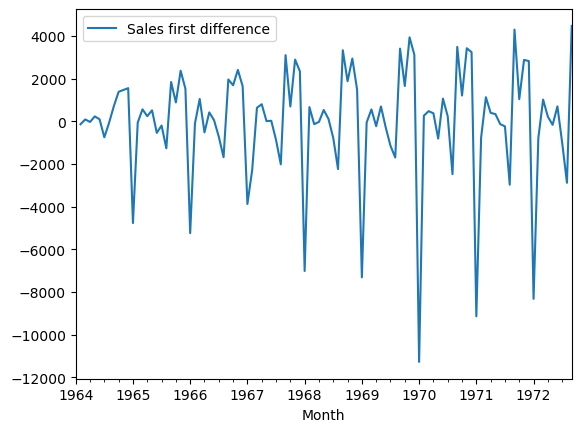

In [157]:
input_df.plot(y='Sales first difference')
test_result_stationary = adfuller(input_df['Sales first difference'].dropna())
test_result_stationary

(-7.626619157213163,
 2.060579696813685e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

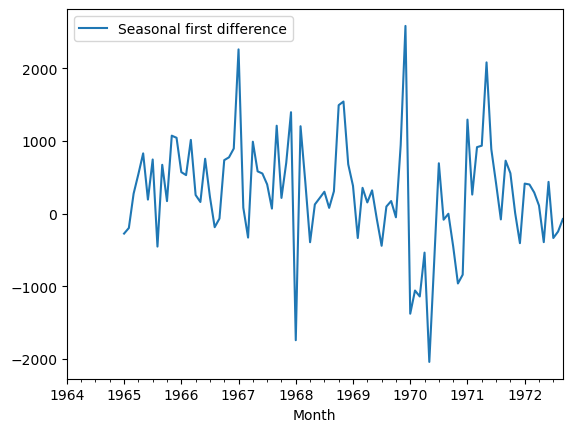

In [155]:
input_df.plot(y='Seasonal first difference')
test_result_stationary = adfuller(input_df['Seasonal first difference'].dropna())
test_result_stationary

In [166]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

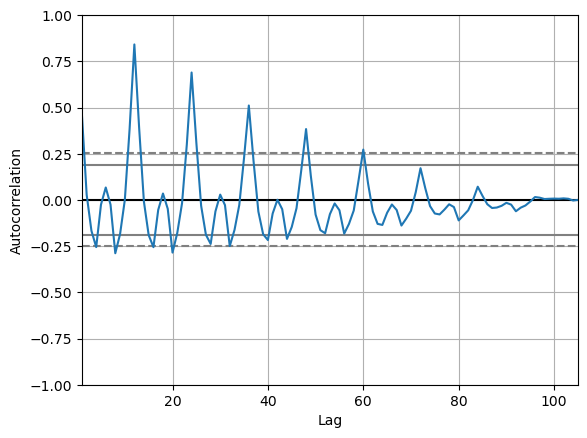

In [168]:
autocorrelation_plot(input_df['Sales'])

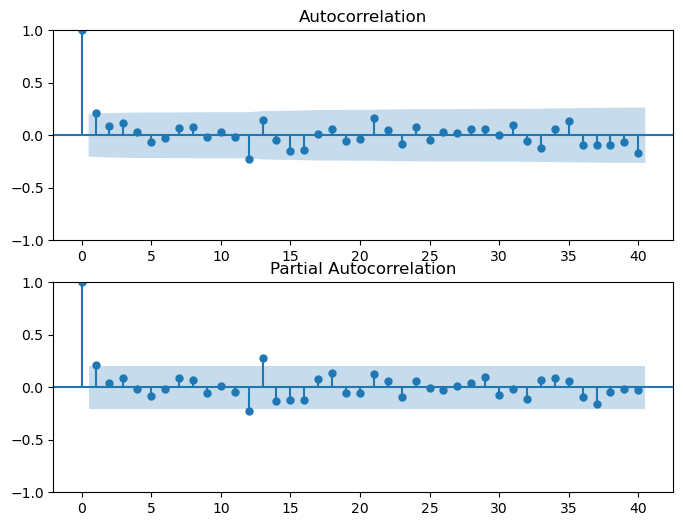

In [178]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(211)
fig = plot_acf(input_df['Seasonal first difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(input_df['Seasonal first difference'].dropna(),lags=40,ax=ax2)

In [184]:
from statsmodels.tsa.arima.model import ARIMA

In [199]:
model = ARIMA(input_df['Sales'],order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sat, 15 Feb 2025   AIC                           1911.627
Time:                        23:16:00   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

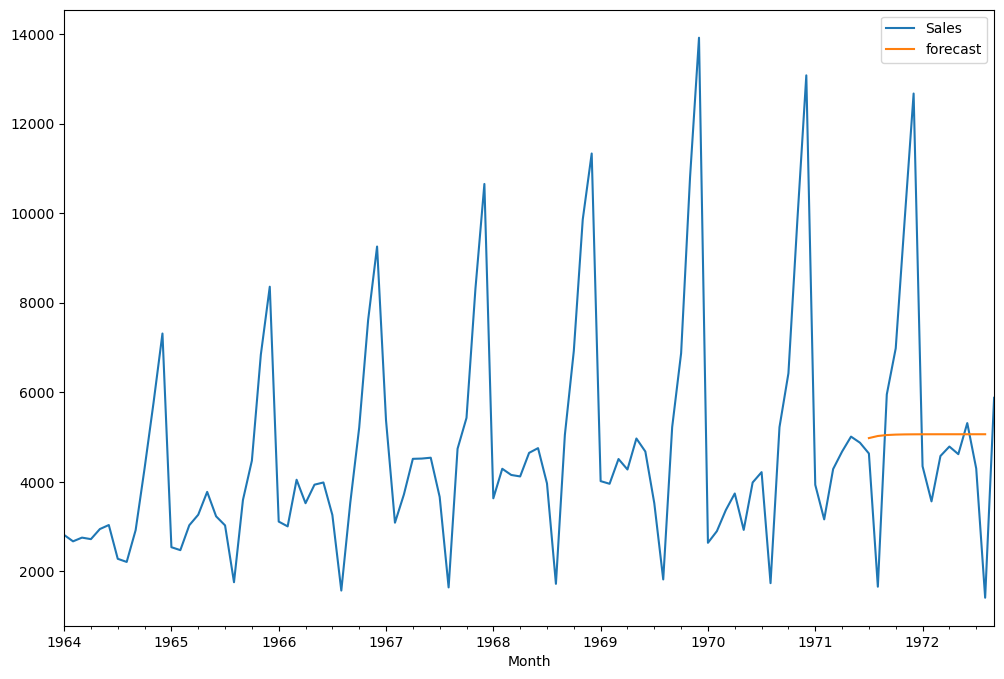

In [203]:
input_df['forecast'] = model_fit.predict(start=90, end = 103, dynamic = True)
input_df[['Sales','forecast']].plot(figsize=(12,8))

In [213]:
pip install --upgrade statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------------------------------- - 9.4/9.8 MB 53.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2
Note: you may need to restart the kernel to use updated packages.


In [219]:
import statsmodels.api as sm

In [223]:
model = sm.tsa.statespace.SARIMAX(input_df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Sat, 15 Feb 2025   AIC                           1486.804
Time:                                    23:31:01   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

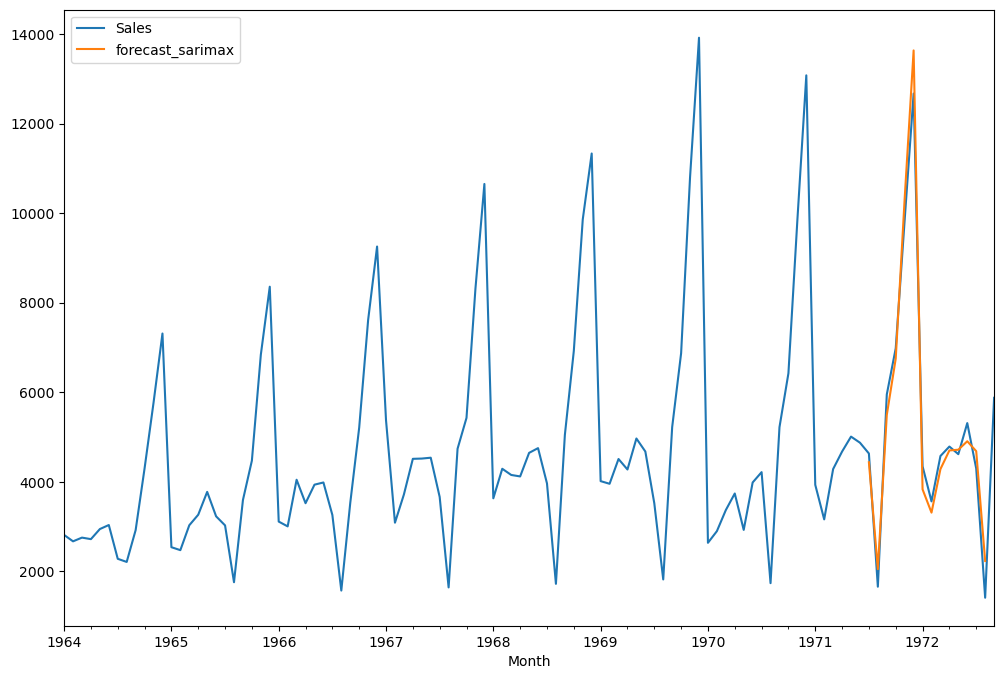

In [227]:
input_df['forecast_sarimax'] = results.predict(start=90,end=103,dynamic = True)
input_df[['Sales','forecast_sarimax']].plot(figsize=(12,8))

In [231]:
input_df

,Sales,Sales first difference,Seasonal first difference,forecast,forecast_sarimax
Month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN
...,...,...,...,...,...
1972-05-01,4618.0,-170.0,-392.0,5062.881345,4717.509568
1972-06-01,5312.0,694.0,438.0,5062.898960,4906.403314
1972-07-01,4298.0,-1014.0,-335.0,5062.906966,4685.435314


In [233]:
from pandas.tseries.offsets import DateOffset

In [241]:
future_dates = [input_df.index[-1] + DateOffset(months = x) for x in range(0,24)]
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [243]:
future_dataset = pd.DataFrame(index=future_dates[1:],columns = input_df.columns)
future_dataset

,Sales,Sales first difference,Seasonal first difference,forecast,forecast_sarimax
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [247]:
final_dataset = pd.concat([input_df,future_dataset])
final_dataset

,Sales,Sales first difference,Seasonal first difference,forecast,forecast_sarimax
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN
...,...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN


<Axes: >

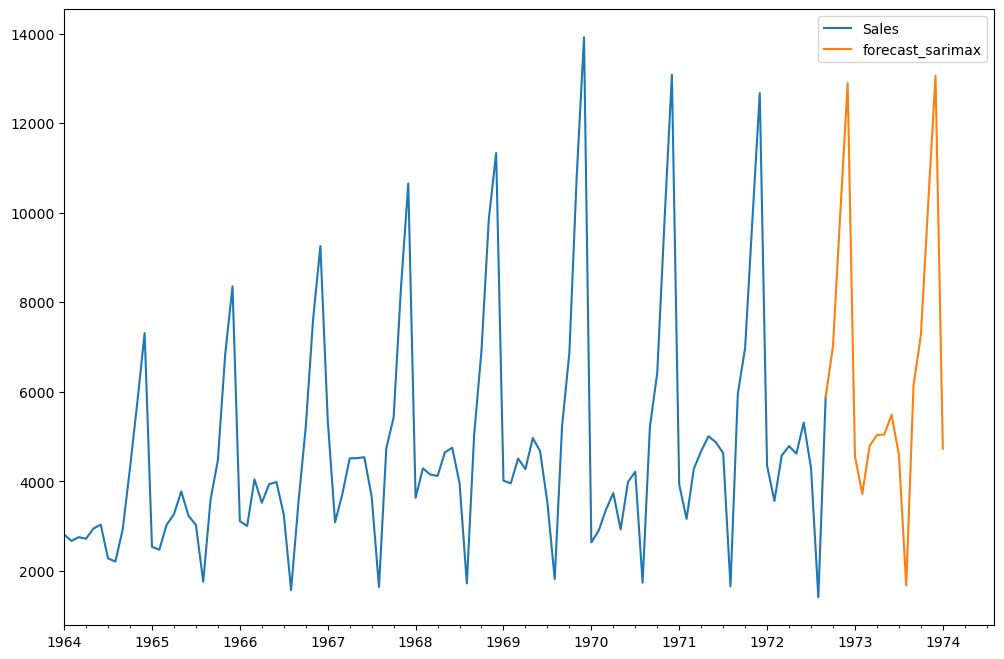

In [249]:
final_dataset['forecast_sarimax'] = results.predict(start=104,end=120,dynamic = True)
final_dataset[['Sales','forecast_sarimax']].plot(figsize=(12,8))